In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

Import data

In [12]:
# import data
df1 = pd.read_csv('2015.csv',encoding = "ISO-8859-1")
df2 = pd.read_csv('2016.csv',encoding = "ISO-8859-1")
df = pd.concat([df1,df2])
df.reset_index(drop=True,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 16 columns):
uid                     2226 non-null int64
name                    2226 non-null object
age                     2226 non-null object
gender                  2226 non-null object
raceethnicity           2226 non-null object
armed                   2226 non-null object
month                   2226 non-null object
day                     2226 non-null int64
year                    2226 non-null int64
streetaddress           2194 non-null object
city                    2226 non-null object
state                   2226 non-null object
latitude                2156 non-null float64
longitude               2156 non-null float64
classification          2226 non-null object
lawenforcementagency    2226 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 278.3+ KB


In [14]:
df.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<H3><center>First degree analysis  </center></H3>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [46]:
#drop unneeded columns
df.drop(['uid','name','lawenforcementagency','streetaddress'],axis=1,inplace=True)

ValueError: labels ['uid' 'name' 'lawenforcementagency' 'streetaddress'] not contained in axis

In [40]:
#temporarily drop more columns for graphical analysis
vc=df.drop(['age','day','month','year','city','state','latitude','longitude'],axis=1)

In [41]:
vc.head(2)

,gender,raceethnicity,armed,classification
0,Male,Black,No,Death in custody
1,Male,White,Firearm,Gunshot


White                     1150
Black                      568
Hispanic/Latino            378

In [50]:
# note: only works if desc order is correct
white,black,hispanic = df['raceethnicity'].value_counts()[:3]

In [42]:
for col in list(vc.columns):
    df[col].value_counts()
    df[col].value_counts(normalize=True)

Male              2115
Female             110
Non-conforming       1
Name: gender, dtype: int64

Male              0.950135
Female            0.049416
Non-conforming    0.000449
Name: gender, dtype: float64

White                     1150
Black                      568
Hispanic/Latino            378
Asian/Pacific Islander      45
Unknown                     43
Native American             34
Arab-American                7
Other                        1
Name: raceethnicity, dtype: int64

White                     0.516622
Black                     0.255166
Hispanic/Latino           0.169811
Asian/Pacific Islander    0.020216
Unknown                   0.019317
Native American           0.015274
Arab-American             0.003145
Other                     0.000449
Name: raceethnicity, dtype: float64

Firearm               1053
No                     389
Knife                  310
Unknown                153
Other                  134
Non-lethal firearm      93
Vehicle                 79
Disputed                15
Name: armed, dtype: int64

Firearm               0.473046
No                    0.174753
Knife                 0.139263
Unknown               0.068733
Other                 0.060198
Non-lethal firearm    0.041779
Vehicle               0.035490
Disputed              0.006739
Name: armed, dtype: float64

Gunshot              2021
Death in custody       82
Taser                  72
Struck by vehicle      49
Other                   2
Name: classification, dtype: int64

Gunshot              0.907907
Death in custody     0.036837
Taser                0.032345
Struck by vehicle    0.022013
Other                0.000898
Name: classification, dtype: float64

### Gender
    95% male
    5% female
### Race
    White: 52%            
    Black: 26%            
    Hispanic: 17%         
### Weapon
    Firearm: 47%              
    No: 17%                   
    Knife: 14%    
### Cause of Death
    Gunshot: 91% 
    Death in Custody: 4% 
    Taser: 3% 
    Vehicle: 2% 

Let's see a more visual representation of this data

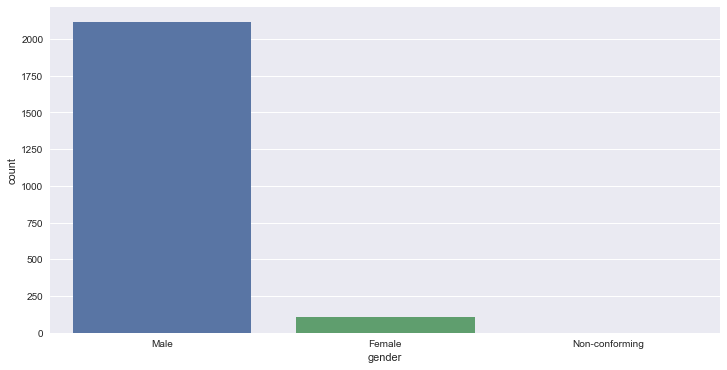

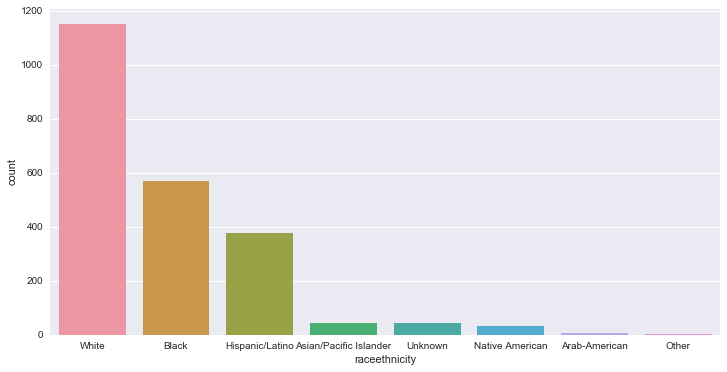

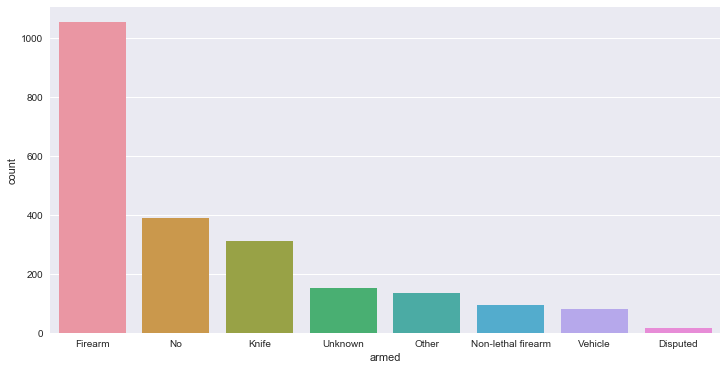

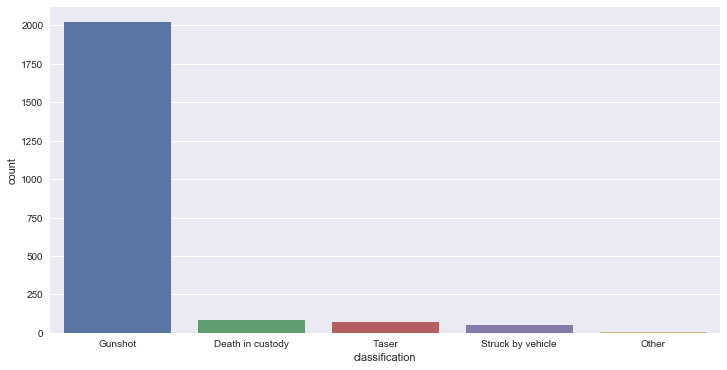

In [45]:
for col in list(vc.columns):
    sns.countplot(df[col],order=df[col].value_counts().index)
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<H3><center>Second degree analysis  </center></H3>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

What percent of blacks had guns? What percent of whites had guns?

In [55]:
w_armed,b_armed,h_armed = df[df['armed']=='Firearm']['raceethnicity'].value_counts()[:3]

In [57]:
'{} % of blacks had guns'.format(round(100*b_armed/black,2))

'49.12 % of blacks had guns'

In [58]:
'{} % of whites had guns'.format(round(100*w_armed/white,2))

'48.7 % of whites had guns'

So whites were armed more often than blacks

Let's look at unarmed whites and blacks

In [22]:
df[df['armed']=='No']['raceethnicity'].value_counts()

White                     190
Black                     119
Hispanic/Latino            65
Native American             6
Asian/Pacific Islander      5
Unknown                     2
Arab-American               2
Name: raceethnicity, dtype: int64

In [23]:
'percent of whites who were unarmed {} %:'.format(round(100*106/584,3))

'percent of whites who were unarmed 18.151 %:'

In [24]:
'percent of blacks who were unarmed {} %:'.format(round(100*79/307,3))

'percent of blacks who were unarmed 25.733 %:'

So a higher percentage of blacks who were shot were unarmed

In [25]:
df[df['armed']=='No']['raceethnicity'].value_counts(normalize=True)

White                     0.488432
Black                     0.305913
Hispanic/Latino           0.167095
Native American           0.015424
Asian/Pacific Islander    0.012853
Unknown                   0.005141
Arab-American             0.005141
Name: raceethnicity, dtype: float64

Now let's normalize the race data with respect to the population

In [27]:
df['raceethnicity'].value_counts()

White                     1150
Black                      568
Hispanic/Latino            378
Asian/Pacific Islander      45
Unknown                     43
Native American             34
Arab-American                7
Other                        1
Name: raceethnicity, dtype: int64

In [28]:
races = "White, Black, Hispanic/Latino, Asian/Pacific Islander, Native American".split(', ')

In [29]:
races

['White',
 'Black',
 'Hispanic/Latino',
 'Asian/Pacific Islander',
 'Native American']

In [30]:
rf = df[df['raceethnicity'].apply(lambda x: x in races)]

In [31]:
rf.reset_index(drop=True,inplace=True)

In [32]:
rf

,age,gender,raceethnicity,armed,month,day,year,city,state,latitude,longitude,classification
0,22,Male,Black,No,January,1,2015,Savannah,GA,32.066691,-81.167881,Death in custody
1,47,Male,White,Firearm,January,2,2015,Aloha,OR,45.487473,-122.891698,Gunshot
2,19,Male,White,No,January,3,2015,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle
3,23,Male,Hispanic/Latino,No,January,3,2015,Wichita,KS,37.693797,-97.280549,Gunshot
4,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,Shelton,WA,47.246534,-123.119497,Gunshot
5,32,Male,White,Non-lethal firearm,January,4,2015,San Francisco,CA,37.762849,-122.422005,Gunshot
6,22,Male,Hispanic/Latino,Firearm,January,5,2015,Chandler,AZ,33.327912,-111.835176,Gunshot
7,39,Male,Hispanic/Latino,Other,January,5,2015,Evans,CO,40.384063,-104.692090,Gunshot
8,25,Male,White,Knife,January,6,2015,Stockton,CA,37.929792,-121.298139,Gunshot
9,26,Male,Black,No,January,6,2015,Los Angeles,CA,33.920677,-118.245431,Taser


In [33]:
rf['raceethnicity'].value_counts()

White                     1150
Black                      568
Hispanic/Latino            378
Asian/Pacific Islander      45
Native American             34
Name: raceethnicity, dtype: int64

In [34]:
rf['raceethnicity'].value_counts(normalize=True)

White                     0.528736
Black                     0.261149
Hispanic/Latino           0.173793
Asian/Pacific Islander    0.020690
Native American           0.015632
Name: raceethnicity, dtype: float64

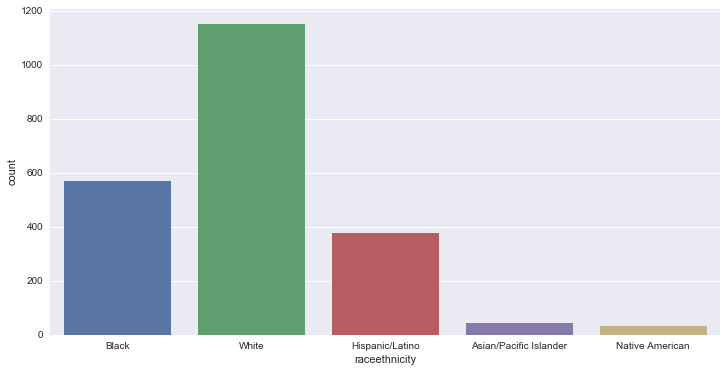

In [35]:
sns.countplot(rf['raceethnicity'])

In [36]:
pop = [12.6,72.4,16.3,5,.9]

In [37]:
# Population percentages from 2010 US Census Data
# white, black, hispanic = [69.9,17.7,19] (NY)
# white, black, hispanic = [72.4,12.6,16.3] (US)

The US population was around 320,000,000 in 2015-2016 and there were 2226 police fatalities during that two year period. The estimated likelihood of being killed by a police officer in a given year is estimated to be 1113 per 320,000,000 or 0.35 per 100,000. 

The rate at which officers are killed by citizens is 16 times higher (5.6 per 100,000)